In [2]:
import numpy as np  # bach nkhedmo b math
import matplotlib.pyplot as plt  # bach nkhedmo b graph
from sklearn.datasets import load_digits  # bach nkhedmo b dataset
from sklearn.model_selection import train_test_split  # bach nkhedmo b split data
from sklearn.neighbors import KNeighborsClassifier  # bach nsaybo l model knn
from sklearn.metrics import accuracy_score, confusion_matrix  # bach nkhedmo b les metrics


In [3]:
#1 - njibo dataset
digits = load_digits()  

#2 - ne3tiw X w y les features w labels
X, y = digits.data, digits.target

#3 - nqesmo data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

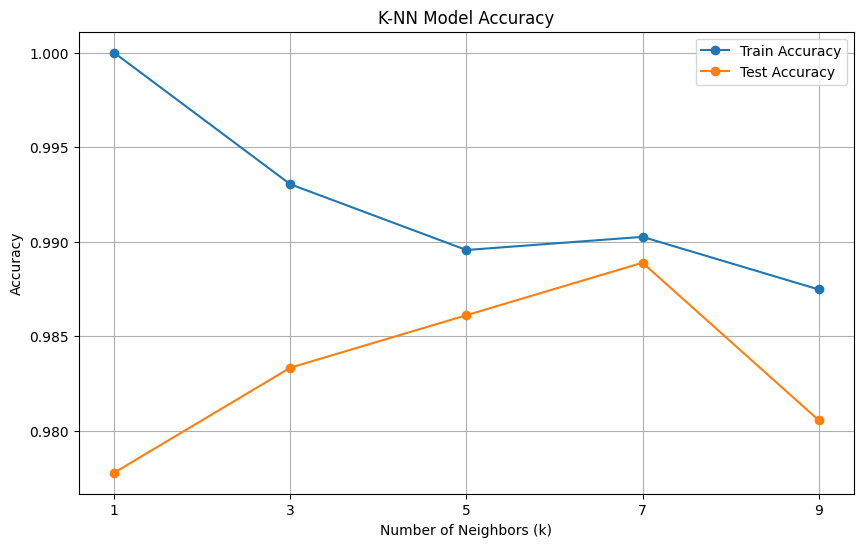

In [10]:
k_values = [1, 3, 5, 7, 9]
train_scores = []
test_scores = []

for k in k_values:
    #nsaybo module
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #entriniw lmodule
    knn.fit(X_train, y_train)
    
    #ndiro prediction 3la donne dyal train w test
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
#n affichiw l score d train w test en fonction de k
# Afficher les scores d'entraînement et de test en fonction de k
plt.figure(figsize=(10, 6))  # Créer une nouvelle figure avec une taille spécifiée
plt.plot(k_values, train_scores, label='Train Accuracy', marker='o')  # Tracer la précision sur les données d'entraînement en fonction de k
plt.plot(k_values, test_scores, label='Test Accuracy', marker='o')  # Tracer la précision sur les données de test en fonction de k
plt.xlabel('Number of Neighbors (k)')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Accuracy')  # Ajouter une étiquette à l'axe des y
plt.title('K-NN Model Accuracy')  # Ajouter un titre au graphique
plt.xticks(k_values)  # Définir les étiquettes des graduations sur l'axe des x
plt.legend()  # Ajouter une légende au graphique
plt.grid(True)  # Activer la grille sur le graphique
plt.show()  # Afficher le graphique


In [11]:
train_accuracy = accuracy_score(y_train, knn.predict(X_train))
test_accuracy = accuracy_score(y_test, knn.predict(X_test))

train_scores.append(train_accuracy)  # Ajouter la précision sur les données d'entraînement actuelles à la liste des scores d'entraînement
test_scores.append(test_accuracy)  # Ajouter la précision sur les données de test actuelles à la liste des scores de test

# Dans cette partie, vous ajoutez à nouveau les mêmes précisions calculées ci-dessus, ce qui double la taille des listes train_scores et test_scores
train_scores.append(train_accuracy)  # 
test_scores.append(test_accuracy)  #


Best k: 7
Accuracy: 0.9888888888888889


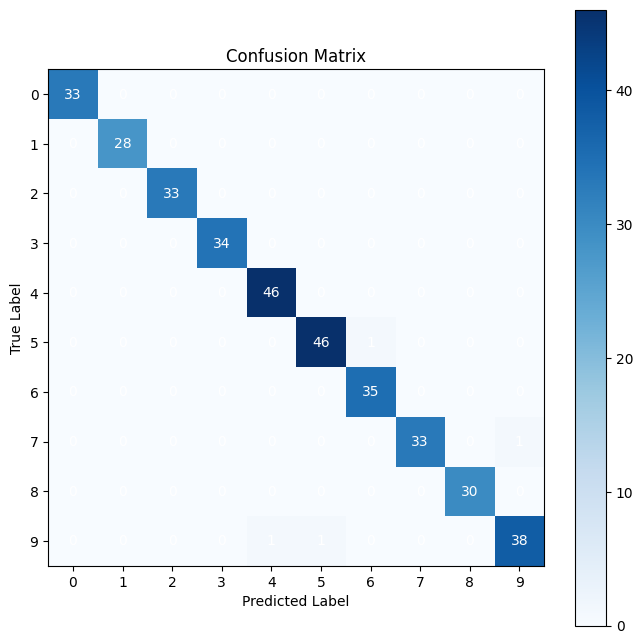

In [12]:
# Choisir le meilleur k
best_k = k_values[np.argmax(test_scores)]
print(f"Best k: {best_k}")

# Entraîner le modèle K-NN avec le meilleur k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = best_knn.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10), labels=np.arange(10))
plt.yticks(np.arange(10), labels=np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()